<a href="https://colab.research.google.com/github/alexandertaoadams/AlexanderAdamsMastersThesis/blob/main/Complexity_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gpjax

In [21]:
import jax
import gpjax
import jax.numpy as jnp
import time
import matplotlib.pyplot as plt

In [22]:
!git clone https://github.com/alexandertaoadams/AlexanderAdamsMastersThesis.git

import sys
sys.path.insert(0, '/content/AlexanderAdamsMastersThesis')
import AlexanderAdamsMastersThesis.src as src

from src.algorithms import Gram_XX_jit

fatal: destination path 'AlexanderAdamsMastersThesis' already exists and is not an empty directory.


## **Timing Test**

In [23]:
# Approximation of 1 second long Brownian Motion
def brownian_motion(number, dimensions, length):
    shape = (number, dimensions, length)
    key = jax.random.PRNGKey(0)
    gaussian_matrix = jax.random.normal(key, shape) / jnp.sqrt(length)
    brownian_matrix = jnp.cumsum(gaussian_matrix, axis=2)
    return jnp.array(brownian_matrix)

In [24]:
n_levels = 4
n_X = jnp.arange(1,100)
n_dimensions=32
n_timesteps=30

In [25]:
number_trials = 10
ones_D = jnp.ones(n_dimensions)
ones_lev = jnp.ones(n_levels)

# Compile once
for N in n_X:
    bm = brownian_motion(N, n_dimensions, n_timesteps)
    _ = Gram_XX_jit(bm, N.item(), n_timesteps, n_levels-1, ones_D, 1.0, ones_lev)

# Run
times_array = []
for N in n_X:
    trial_times = []

    for _ in range(number_trials):
        bm = brownian_motion(N, n_dimensions, n_timesteps)

        t0 = time.perf_counter()
        _ = Gram_XX_jit(bm, N.item(), n_timesteps, n_levels-1, ones_D, 1.0, ones_lev)
        t1 = time.perf_counter()

        trial_times.append(t1-t0)

    median = jnp.median(jnp.array(trial_times))
    times_array.append(median)

times_array = jnp.array(times_array)

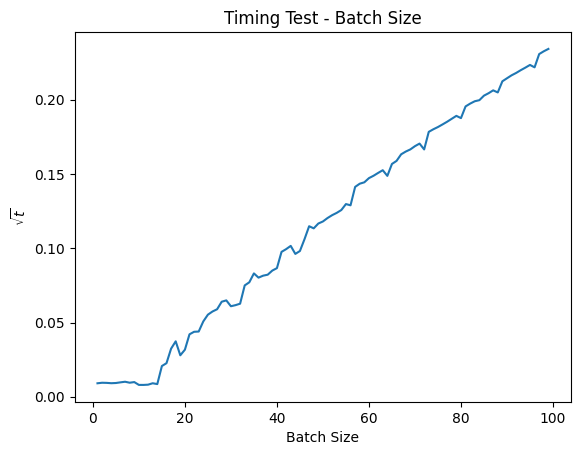

In [26]:
plt.plot(n_X, jnp.sqrt(times_array))
plt.title("Timing Test - Batch Size")
plt.xlabel("Batch Size")
plt.ylabel(r"$\sqrt{t}$")
plt.show()